In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statistics

In [2]:
def model_ols(y, x):
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return model

def show(data, y_symbol, x_symbol):
    y = data[y_symbol]
    x = data[x_symbol]
    
    model=model_ols(y, x)
    std = statistics.stdev(model.resid)
    entry_threshold = 2 # entrada em 2 desvio padrão

    #plt.figure(figsize=(15,6))
    plt.figure(figsize=(10,5))
    plt.plot(model.resid)
    plt.ylabel('Residual')
    plt.title(y_symbol + ' / ' + x_symbol)

    plt.axhline(0, color='black',label='mean',linestyle='--') # Add the mean of residual
    plt.axhline(entry_threshold*std, color='green', linestyle='--',label='trade')
    plt.axhline(-entry_threshold*std, color='green', linestyle='--')

    plt.legend()
    plt.show()

In [32]:
pairs = pd.read_csv('datasets/cointegrated_pairs.csv', index_col=0)
data = pd.read_csv('datasets/data.csv', index_col=0)
pairs.head(3)

,Dependente,Independente,pValue,ADFStatistic,Beta,HalfLife,Hurst,Corr,Signal,SignalPerc
0,AALR3,ABCB4,0.023039,-3.150434,1.308303,3,0.254748,0.978935,SL,0.152031
1,AALR3,ALSO3,0.005086,-3.637314,0.424785,3,0.208671,0.984446,SL,0.337758
2,AALR3,ALUP11,0.012351,-3.361289,1.681917,3,0.199234,0.968927,LS,0.564905


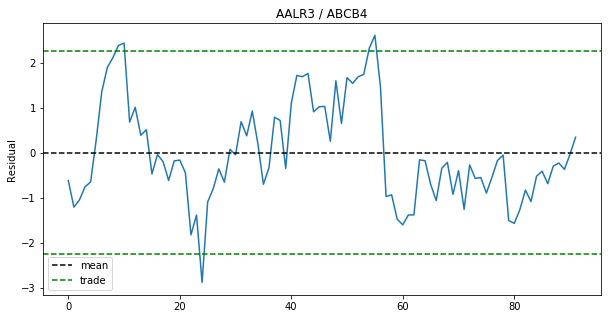

In [34]:
show(data, 'AALR3', 'ABCB4')

In [39]:
df_hurst = pairs.loc[(pairs['Hurst'] > 0) & (pairs['Hurst'] < 0.4)]
df_hurst

,Dependente,Independente,pValue,ADFStatistic,Beta,HalfLife,Hurst,Corr,Signal,SignalPerc
0,AALR3,ABCB4,0.023039,-3.150434,1.308303,3,0.254748,0.978935,SL,0.152031
1,AALR3,ALSO3,0.005086,-3.637314,0.424785,3,0.208671,0.984446,SL,0.337758
2,AALR3,ALUP11,0.012351,-3.361289,1.681917,3,0.199234,0.968927,LS,0.564905
3,AALR3,ANIM3,0.038146,-2.966476,0.660030,5,0.214762,0.964894,LS,0.331220
4,AALR3,ARZZ3,0.009324,-3.451473,0.476037,3,0.172292,0.969824,LS,0.311394
...,...,...,...,...,...,...,...,...,...,...
24430,YDUQ3,VIVA3,0.006510,-3.562942,1.730796,3,0.280037,0.977444,LS,0.190595
24431,YDUQ3,WHRL4,0.036003,-2.988289,7.152123,4,0.273358,0.910374,SL,0.090867
24432,YDUQ3,WIZS3,0.013005,-3.344433,3.682103,3,0.212889,0.964256,SL,0.440911
24433,YDUQ3,WSON33,0.000691,-4.187886,1.319811,3,0.148051,0.978848,LS,0.206183


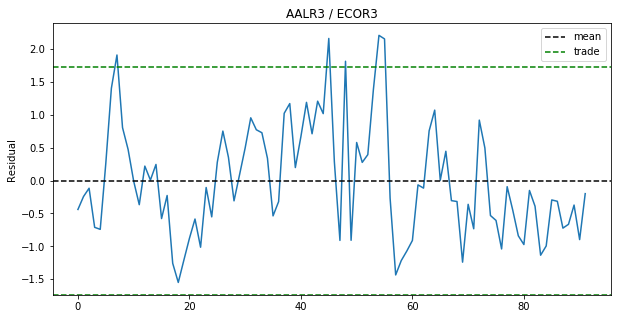

In [50]:
show(data, 'AALR3', 'ECOR3')

In [48]:
df_hurst.loc[(df_hurst['SignalPerc'] >= 0.9)]

,Dependente,Independente,pValue,ADFStatistic,Beta,HalfLife,Hurst,Corr,Signal,SignalPerc
13,AALR3,BIOM3,0.021324,-3.177516,1.936934,4,0.091845,0.948709,LS,1.353150
28,AALR3,CPLE6,0.021904,-3.168141,0.516703,3,0.270859,0.963207,LS,0.965427
82,AALR3,SCAR3,0.003374,-3.757463,0.583977,3,0.146808,0.970132,SL,0.917988
121,ABCB4,BIOM3,0.023070,-3.149969,1.428205,5,0.185645,0.934895,LS,1.340161
195,ABEV3,BRAP3,0.045040,-2.902656,0.563350,4,0.163946,0.930636,LS,1.055830
...,...,...,...,...,...,...,...,...,...,...
24134,XBOV11,PIBB11,0.000286,-4.408906,0.568431,1,0.121218,0.999912,LS,1.259090
24379,YDUQ3,CPFE3,0.004740,-3.658250,2.577700,2,0.091936,0.968126,LS,1.182239
24381,YDUQ3,CPLE6,0.001266,-4.029105,1.182540,2,0.094883,0.970171,LS,1.018062
24406,YDUQ3,MDIA3,0.011292,-3.390345,2.290906,3,0.163770,0.944181,LS,1.450104


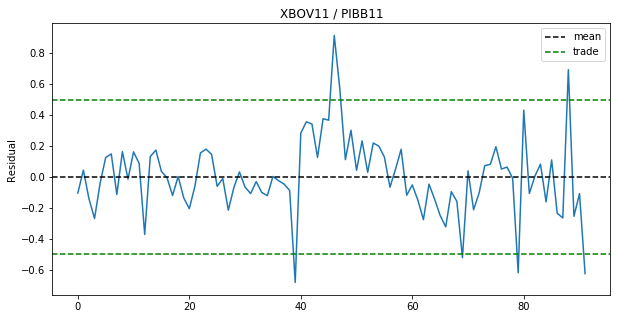

In [51]:
show(data, 'XBOV11', 'PIBB11')